In [1]:
import numpy as np
import warnings
warnings.filterwarnings('ignore')

## 2-D (line)

In [2]:
x = np.array([0,1,2,3,4,5]) #no of yrs of experince
y = np.array([10000,20000,30000,40000,50000,60000]) #salary

#y = mx + c
#salary = m * (yoe) + c
# Here we have to find m,c (2 parameters in 2d). Then we can find salary for any yoe

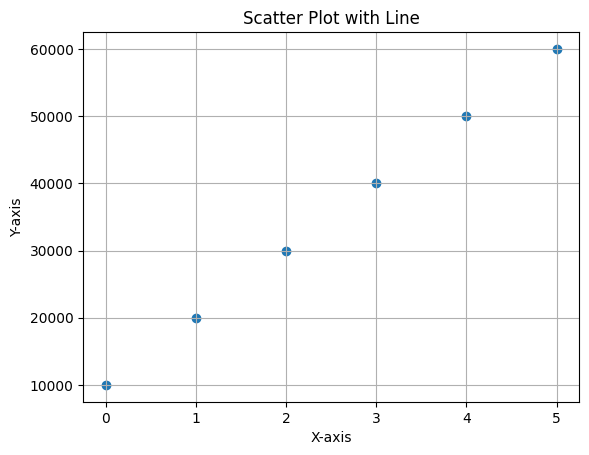

In [3]:
import matplotlib.pyplot as plt

plt.scatter(x,y)

plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.title("Scatter Plot with Line")
plt.grid()
plt.show()

In [4]:
X = x.reshape((-1, 1))  # Reshape x to a 2D array
X

array([[0],
       [1],
       [2],
       [3],
       [4],
       [5]])

In [5]:
y

array([10000, 20000, 30000, 40000, 50000, 60000])

In [6]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X, y)

# import sklearn as sk
# model = sk.linear_model.LinearRegression()
# model.fit(X, y)

LinearRegression()

In [7]:
# y = mx + c

print(model.intercept_) #c
print(model.coef_) #m

9999.999999999996
[10000.]


In [8]:
# y = 10000*x + 10000 or y = 10000*yoe + 10000

In [9]:
# Find salary (y) given experince for 10(x) years
y = 10000*(10) + 10000
y

110000

In [10]:
y = model.predict([[10]])
y

array([110000.])

In [11]:
# Find salary (y) given experince for 15.5 (x) years
y = 10000*(15.5) + 10000
y

165000.0

In [12]:
y = model.predict([[15.5]])
y

array([165000.])

In [13]:
y = model.predict([[15.5],[10]])
y

array([165000., 110000.])

In [14]:
X

array([[0],
       [1],
       [2],
       [3],
       [4],
       [5]])

In [15]:
y_pred = model.predict(X)
y_pred

array([10000., 20000., 30000., 40000., 50000., 60000.])

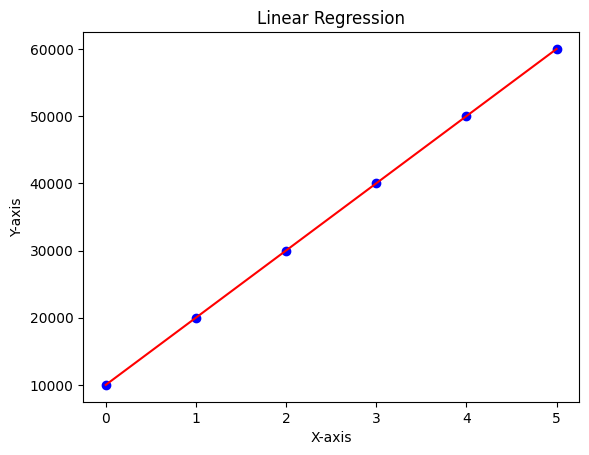

In [16]:
x = np.array([0,1,2,3,4,5]) #no of yrs of experince
y = np.array([10000,20000,30000,40000,50000,60000]) #salary

plt.scatter(x, y, color='blue')
plt.plot(x, y_pred, color='red')  # Plot the regression line
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.title("Linear Regression")
plt.show()

In [23]:
y_pred = model.predict([[4.5]])
y_pred # see graph for interpretation

array([55000.])

# 3d (Plane)

In [17]:
#In 2d, y = mx + c
#In 3d, y = m1*x1 + m2*x2 + c   or   y = w0 + w1*x1 + w2*x2

In [22]:
import pandas as pd

df = pd.read_csv('line_3d.csv')
df.head()

,Years of Experience,Hours of Study,Salary
0,0,0,10000
1,1,10,20000
2,2,20,30000
3,3,30,40000
4,4,40,50000


In [24]:
# Here y = salary, x1 = Years of Experience, x2 = Hours of Study
# salary = w0 + w1*(yoe) + w2*(hos)
# Here we have to find w0,w1,w2 (3 parameters in 3d). Then we can find salary for any yoe and hos

In [21]:
df.shape

(6, 3)

In [25]:
import plotly.express as px

# Create a 3D scatter plot using Plotly
fig = px.scatter_3d(df, x='Years of Experience', y='Hours of Study', z='Salary',
                    title='Salary vs. Experience and Study Hours',
                    labels={'Years of Experience': 'Years of Experience',
                            'Hours of Study': 'Hours of Study (per month)',
                            'Salary': 'Salary'})
fig.show()

In [26]:
df.columns

Index(['Years of Experience', 'Hours of Study', 'Salary'], dtype='object')

In [27]:
df[['Years of Experience', 'Hours of Study']]

,Years of Experience,Hours of Study
0,0,0
1,1,10
2,2,20
3,3,30
4,4,40
5,5,50


In [29]:
X = df[['Years of Experience', 'Hours of Study']].values
X

array([[ 0,  0],
       [ 1, 10],
       [ 2, 20],
       [ 3, 30],
       [ 4, 40],
       [ 5, 50]])

In [31]:
y = df['Salary'].values
y

array([10000, 20000, 30000, 40000, 50000, 60000])

In [32]:
model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [33]:
# y = w0 + w1*x1 + w2*x2

print(model.intercept_) #w0
print(model.coef_) #[w1, w2]

Intercept: 9999.999999999985
Coefficients: [ 99.00990099 990.0990099 ]


In [ ]:
# y = 9999.999999999985 + 99.00990099*x1 + 990.0990099*x2
# y = 9999.999999999985 + 99.00990099*yoe + 990.0990099*hos

array([10000., 20000., 30000., 40000., 50000., 60000.])

In [35]:
yoe = 15
hos = 10

y = 9999.999999999985 + 99.00990099*yoe + 990.0990099*hos
y

21386.138613849987

In [36]:
y_pred = model.predict([[15,10]])
y_pred

array([21386.13861386])

### Significance of w1 and w2 and w0

In [38]:
y_pred = model.predict([[15,10],[20,10]]) # as yoe increases, salary also increase (+ve corelation) (since w1 is positive)
y_pred

array([21386.13861386, 21881.18811881])

In [40]:
y_pred = model.predict([[15,10],[15,15]]) # as no of hrs increases, salary also increase (+ve corelation) (since w2 is positive)
y_pred

array([21386.13861386, 26336.63366337])

In [ ]:
# sign of w1 and w2 will tell me correlation of yoe and hos with salary
# w0 will tell me what will be my salary when my yoe and hos is zero (put zero in x1 and x2 and see y or salary)

In [43]:
import plotly.graph_objects as go
import numpy as np

# Create the 3D scatter plot
fig = go.Figure()

# Add the scatter plot points
fig.add_trace(go.Scatter3d(x=df['Years of Experience'], y=df['Hours of Study'], z=df['Salary'], mode='markers', name='Actual Salary'))

# Generate points for the prediction plane
x1_plane = np.linspace(min(x1), max(x1), 10)
x2_plane = np.linspace(min(x2), max(x2), 10)
x1_plane, x2_plane = np.meshgrid(x1_plane, x2_plane)
z_plane = model.intercept_ + model.coef_[0] * x1_plane + model.coef_[1] * x2_plane


# Add the prediction plane
fig.add_trace(go.Surface(x=x1_plane, y=x2_plane, z=z_plane, opacity=0.5, name='Predicted Salary'))

# Set axis labels and title
fig.update_layout(scene=dict(xaxis_title='Years of Experience',
                             yaxis_title='Hours of Study',
                             zaxis_title='Salary'),
                  title='Salary Prediction in 3D')

# Show the plot
fig.show()

## 4d (hyper plane)

In [55]:
df = pd.read_csv("/content/house_prices.csv")
df.head()

,num_rooms,area,porch,price
0,7,276,1,268942.368996
1,4,150,1,182523.945480
2,8,224,0,239795.819106
3,5,255,1,240209.344606
4,7,180,0,224472.158735


In [56]:
df.shape

(100, 4)

In [ ]:
#In 2d, y = mx + c
#In 3d, y = w0 + w1*x1 + w2*x2
#In 4d, y = w0 + w1*x1 + w2*x2 + w3*x3

# x1 = num_rooms
# x2 = area
# x3 = porch
#In 4d, y = w0 + w1*x1 + w2*x2 + w3*x3 or price = w0 + w1*num_rooms + w2*area + w3*porch

In [ ]:
# Give me price (y) for num_rooms = 15, area = 15000, porch = 1
# Also comment on relation of num_rooms, area and porch with price

#steps (take reference from above 3d model)
#create your X and y
#fit the Linearregression model on X and y
#print the intercept and coefficients
#use model.predict or direct formula to predict price for values of num_rooms = 15, area = 15000, porch = 1
#comment on ralation of each column with price based on coefficients value
